Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

🎓 Laboratório 5 - Árvore de decisão (Parte 2)

---
> 👨‍🏫*Professor Rooney Coelho (rracoelho@pucsp.br)*
---




## O problema de classificação
Suponha que estejamos perdidos em uma floresta e com muita fome. Incapazes de continuar sem comer algo primeiro, damos uma olhada, apenas para encontrar nada imediatamente comestível - apenas cogumelos.

<center>
<a title="By OliBac from FRANCE [CC BY 2.0 (http://creativecommons.org/licenses/by/2.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3AChampignons_mushrooms_(950475736).jpg"><img width="400" alt="Champignons mushrooms (950475736)" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Champignons_mushrooms_%28950475736%29.jpg/512px-Champignons_mushrooms_%28950475736%29.jpg"/></a>

*Muitos tipos diferentes de cogumelos. Eles são seguros para comer?*
</center>

Estamos morrendo de fome, então qualquer coisa parece ótimo para nós, mas comer um desses descuidadamente pode resultar em envenenamento. Para saber se podemos ou não comer um cogumelo, precisamos **classificá-lo com base em nosso conhecimento de suas características**, ou seja, temos um problema de classificação em nossas mãos.

Esse tipo de problema não é simples de resolver de forma eficaz - há muitas variáveis ​​envolvidas na classificação correta de algo. Existem muitos tipos diferentes de modelos matemáticos que foram criados para nos ajudar nas tarefas de classificação. Um desses modelos é o **modelo de árvore de decisão**.

A Árvore de Decisão é um modelo preditivo baseado na análise de um conjunto de pontos de dados que descrevem o tipo de objeto que desejamos classificar. Em nosso exemplo, pode ser um conjunto de observações do tipo de capa de um cogumelo, sua cor, odor, forma de seu caule, etc. Essas descrições de nosso objeto são chamadas de **características** e são muito importantes em muitos tipos diferentes de algoritmos de aprendizado de máquina, incluindo árvores de decisão. A classificação que queremos desses recursos é posta de lado como uma espécie de "resultado".


In [17]:
# Dependências
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

1) Importe os dados sem o cabeçalho

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

2) Use a seguinte lista para nomear as colunas do DataFrame

In [3]:
nomes = ["Class","cap.shape","cap.surface","cap.color","bruises","odor","gill.attachment","gill.spacing",
                         "gill.size","gill.color","stalk.shape","stalk.root","stalk.surface.above.ring",
                         "stalk.surface.below.ring","stalk.color.above.ring","stalk.color.below.ring","veil.type","veil.color",
                         "ring.number","ring.type","print","population","habitat"]

In [4]:
df = pd.read_csv(url, names=nomes)
df.head()

,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


3) Transforme todos os elementos em dados categóricos usando o método `factorize`. Devido ao alto número de colunas use um comando de repetição para isso.

In [7]:
def to_numeric(data):
    cat_columns = data.select_dtypes(['object']).columns
    data[cat_columns] = data[cat_columns].apply(lambda i: pd.factorize(i)[0])
    return data

cat_df = to_numeric(df)
cat_df.head()

,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


4) Crie um DataFrame `X` com todas as features. Lembrando que o target é o atributo Class.

In [9]:
x = cat_df.drop('Class', axis=1)
x.head()

,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,2
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,0,0,0,1,1,2,1


5) Segmente o Dataframe para a representação do Target (Class)

In [10]:
y = cat_df['Class']
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Class, dtype: int64

6) Crie o modelo de árvore de decisão com o critério de entropia

In [24]:
# Árvore de decisão com critério de entropia
decision_tree = DecisionTreeClassifier(criterion='entropy')

7) Treine o modelo para a totalidade dos dados

In [12]:
clf = decision_tree.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

8) Imprima o nome da feature e sua respectiva importância em ordem decrescente de importância.

In [15]:
# Função que cria um dataframe com as features mais importantes em ordem decrescente
def feature_importance(model, x):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = x.columns
    df = pd.DataFrame({'feature': features[indices], 'importance': importances[indices]})
    return df

In [16]:
# Aplicando a função feature importance
feature_importance(clf, x)

,feature,importance
0,odor,0.902493
1,print,0.036273
2,gill.size,0.022727
3,stalk.root,0.015868
4,habitat,0.014475
5,population,0.008165
6,veil.color,0.000000
7,ring.number,0.000000
8,cap.surface,0.000000
9,cap.color,0.000000


9) Use a função `train_test_split` para separar parte dos dados para treinamento e outra para validação. Use 70% para treino e 30% dos dados para teste.

In [18]:
# Separando os dados de treino e teste em 70% e 30% respectivamente
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [21]:
# Verificando o tamanho dos dados de treino e teste.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5686, 22)
(5686,)
(2438, 22)
(2438,)


10) Crie o classificador e calcule o percentual de acertos do modelo.

In [25]:
# Árvore de decisão para os dados de treino.
train_test_tree = decision_tree.fit(X_train, y_train)
y_pred = train_test_tree.predict(X_test)

In [45]:
# Importando as bibliotecas para a matriz de confusão
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [54]:
# Função para plotar a matriz de confusão com ConfusionMatrixDisplay com a avaliação da acurácia, precisão, recall e f1-score do modelo.

def plt_confusion_matrix(y_test, y_pred, model):
    acc= accuracy_score(y_test, y_pred)
    prec= precision_score(y_test, y_pred)
    rec= recall_score(y_test, y_pred)
    f1= f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.xlabel(f'Predicted value\n\nAccuracy = {acc:.2f}\n\nPrecision = {prec:.2f}\n\nRecall = {rec:.2f}\n\nF1-Score = {f1:.2f}').set_fontsize(15)
    plt.ylabel('True value').set_fontsize(15)
    plt.show()

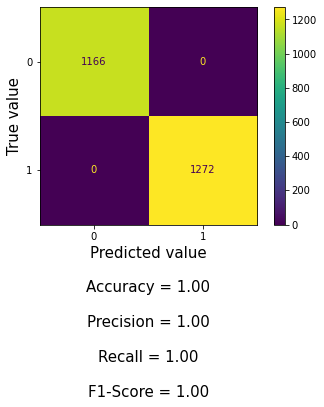

In [55]:
# Plotando a matriz de confusão com ConfusionMatrixDisplay com a avaliação da acurácia, precisão, recall e f1-score do modelo.
plt_confusion_matrix(y_test, y_pred, decision_tree)

**Leia com atenção o seguinte material sobre Random Forests e faça a seguir o que se pede.**

---

### Random Forests 

As Árvores de Decisão são muito interessantes porque pode-se seguir a estrutura criada para entender como a classe foi inferida. No entanto, esse tipo de modelo tem seus próprios problemas. Um dos principais problemas é o que chamamos de **overfitting**. O overfitting acontece quando o processo de criação da árvore torna a árvore extremamente ramificada e complexa - isso significa que o modelo não generalizará corretamente.

Isso pode significar que os pontos de dados são muito variados ou talvez haja muitos recursos a serem analisados ao mesmo tempo. No entanto, se reduzirmos o número de pontos de dados ou recursos, isso pode piorar nosso modelo. Portanto, precisaríamos de outro tipo de solução para este problema.

Isso pode significar que os pontos de dados são muito variados ou talvez haja muitos recursos a serem analisados ao mesmo tempo. No entanto, se reduzirmos o número de pontos de dados ou recursos, isso pode piorar nosso modelo. Portanto, precisaríamos de outro tipo de solução para este problema.

### O que são random forests

* Random forests são uma das soluções propostas. Como se pode inferir de seu nome, as Random Forests são compostas por várias Árvores de Decisão. Isso os torna parte de uma família de modelos - que são compostos por outros modelos trabalhando em conjunto - chamados de **modelos de aprendizagem por conjunto**. 
* O principal conceito por trás do Random Forests é que, se você particionar os dados que seriam usados para criar uma única árvore de decisão em diferentes partes, crie uma árvore para cada uma dessas partições e, em seguida, use um método para "calcular a média" dos resultados de todos dessas árvores diferentes, você deve acabar com um modelo melhor. 
* No caso das árvores utilizadas para classificação, essa "média" é a **moda** do conjunto de árvores da floresta. Para regressão, a "média" é a **média** do conjunto de árvores na floresta.


O principal mecanismo por trás do Random Forests é o **bagging**, que é uma forma abreviada de **agregação por bootstrap**. Bagging é o conceito de amostragem aleatória de alguns dados de um conjunto de dados, mas **com substituição**. O que isso significa na prática é que há alguma quantidade de dados que serão repetidos em cada partição, e alguma quantidade de dados que não serão representados nas amostras - cerca de 63% dos exemplos únicos são mantidos - isso torna de modo que o modelo gerado para aquela bolsa seja capaz de generalizar melhor em algum grau. Cada partição de dados de nossos dados de treinamento para a Random Forest aplica este conceito.

<center>
<img src="https://ibm.box.com/shared/static/5m7lep2u6fzt6ors1b0kpgv0jtzh3z7z.png" width="480">

*Exemplo de ensacamento. Observe como alguns pontos de dados são repetidos - isso é intencional!*
</center>

Você pode estar se perguntando o que acontece com os dados que não estão presentes nas "bolsas". Esses dados, apropriadamente chamados de *Out-Of-Bag Data*, servem como uma espécie de **dados de teste para o modelo gerado** - que serve como validação de que nosso modelo funciona!

Além disso, Random Forests também são criadas usando **feature bagging**, o que faz com que não haja problemas de overfitting devido a uma grande quantidade de recursos para uma pequena quantidade de dados. Por exemplo, se alguns recursos são preditores muito fortes, eles estarão presentes em uma grande quantidade de "bolsas" e essas bolsas se tornarão correlacionadas. No entanto, isso também faz com que a própria Random Forest não se concentre apenas no que prediz fortemente os dados que foram alimentados, tornando o modelo mais generalizado. Tradicionalmente, um conjunto de dados com um número $f$ de recursos terá $\left\lceil{\sqrt[2]{f}}\ \right\rceil$ recursos em cada partição.

<center>
<img src="https://ibm.box.com/shared/static/a4b0d3eg7vtuh8wipj9eo4bat9szow67.png" width="720">

*Exemplo de uma Random forest. Não se esqueça de que os sacos podem ter pontos de dados repetidos!*
</center>

---

11) Faça a mesma coisa da questão anterior usando uma Random Forest com 20 bags (`n_estimators`)

Busque no sklearn a função `RandomForestClassifier` e faça o que se solicitou.

In [36]:
# Importar RamdomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Criar um classificador RandomForest e treinar o modelo.
rfclass = RandomForestClassifier(n_estimators=20, random_state=0)
rfclass_total = rfclass.fit(x, y)
feature_importance(rfclass_total, x)

,feature,importance
0,odor,0.269432
1,print,0.149305
2,stalk.surface.below.ring,0.114680
3,gill.size,0.076471
4,stalk.surface.above.ring,0.058324
5,population,0.047533
6,ring.type,0.046147
7,bruises,0.033396
8,habitat,0.032184
9,stalk.color.above.ring,0.029828


In [62]:
# Modelo de RandomForestClassifier com os dados de treino e teste.
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.25, random_state=0)
rfclass_train_test = rfclass.fit(X_train2, y_train2)
y_pred2 = rfclass_train_test.predict(X_test2)

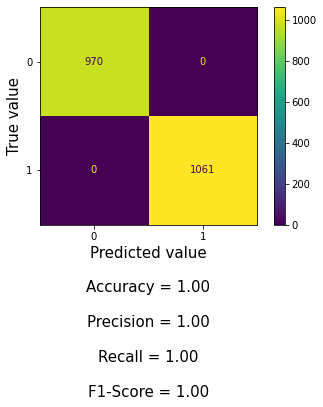

In [63]:
# Plotando a matriz de confusão com ConfusionMatrixDisplay e avaliando a acurácia, precisão, recall e f1-score do modelo.
plt_confusion_matrix(y_test2, y_pred2, rfclass_train_test)